## Project Unsupervised Learning

### Changing the Directory

In [1]:
%cd C:\Users\amol.kumar\Downloads\drive-download-20191118T133407Z-001 (1)

C:\Users\amol.kumar\Downloads\drive-download-20191118T133407Z-001 (1)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
colname=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']

### Read the dataset and understand the features and target variable

In [4]:
df=pd.read_csv("Qualitative_Bankruptcy.data.txt",names=colname)

In [5]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


### Analysis of class with each features

In [7]:
pd.crosstab(df['Industrial Risk'],df['Class'])

Class,B,NB
Industrial Risk,,
A,28,53
N,53,36
P,26,54


In [8]:
pd.crosstab(df['Management Risk'],df['Class'])

Class,B,NB
Management Risk,,
A,23,46
N,73,46
P,11,51


In [9]:
pd.crosstab(df['Financial Flexibility'],df['Class'])

Class,B,NB
Financial Flexibility,,
A,4,70
N,102,17
P,1,56


In [10]:
pd.crosstab(df['Credibility'],df['Class'])

Class,B,NB
Credibility,,
A,17,60
N,87,7
P,3,76


In [11]:
pd.crosstab(df['Competitiveness'],df['Class'])

Class,B,NB
Competitiveness,,
A,4,52
N,103,0
P,0,91


In [12]:
pd.crosstab(df['Operating Risk'],df['Class'])

Class,B,NB
Operating Risk,,
A,24,33
N,64,50
P,19,60


In [13]:
df['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

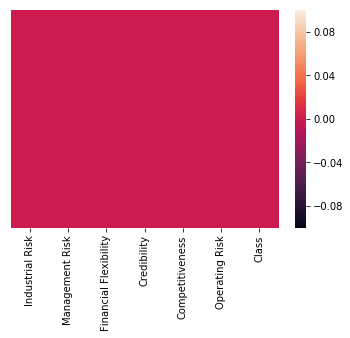

In [14]:
#to check mssing value in dataframe
sns.heatmap(df.isnull(),yticklabels=False)

# Separate the dependant variable from the rest of the train data

In [15]:
X=df.drop('Class',axis=1)

In [16]:
y=df['Class']

# Encode independent features

In [17]:
X=pd.get_dummies(X)

In [18]:
X.head()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [19]:
X.shape

(250, 18)

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
Industrial Risk_A          250 non-null uint8
Industrial Risk_N          250 non-null uint8
Industrial Risk_P          250 non-null uint8
Management Risk_A          250 non-null uint8
Management Risk_N          250 non-null uint8
Management Risk_P          250 non-null uint8
Financial Flexibility_A    250 non-null uint8
Financial Flexibility_N    250 non-null uint8
Financial Flexibility_P    250 non-null uint8
Credibility_A              250 non-null uint8
Credibility_N              250 non-null uint8
Credibility_P              250 non-null uint8
Competitiveness_A          250 non-null uint8
Competitiveness_N          250 non-null uint8
Competitiveness_P          250 non-null uint8
Operating Risk_A           250 non-null uint8
Operating Risk_N           250 non-null uint8
Operating Risk_P           250 non-null uint8
dtypes: uint8(18)
memory usage: 4.5 KB


# Split the dataset into training and test data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((200, 18), (50, 18), (200,), (50,))

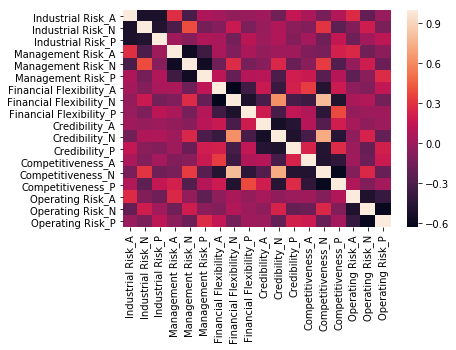

In [22]:
sns.heatmap(X_train.corr())

# Apply PCA on the independent features of train data

##### The first step to run PCA is to Scale the data but as we has done get_dummies so no need to do scaling here

In [23]:
from sklearn.decomposition import PCA

In [24]:
X_centered = X_train - X_train.mean(axis=0)

In [25]:
X_centered.shape

(200, 18)

In [26]:
pca_all = PCA()
pca_all.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance)

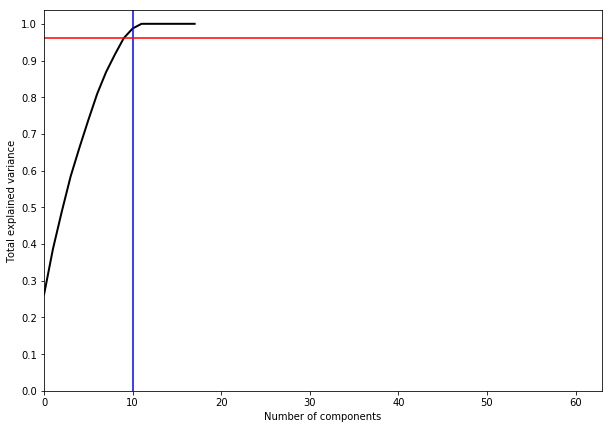

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca_all.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(10, c='b')
plt.axhline(0.96, c='r')

plt.show()

### By seeing the above elbow plot we can conclude that 10 new pca feature will explain more than 95% of variance

In [28]:
pca = PCA(n_components=10)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Transform the data using PCA 

In [29]:
print(pca.explained_variance_ratio_)
print('\n')
print('Sum of Variance')
print(pca.explained_variance_ratio_.sum())

[0.26260431 0.12370029 0.10205489 0.09603516 0.07873083 0.07489249
 0.07153591 0.05897091 0.04815471 0.04440222]


Sum of Variance
0.9610817258753509


In [30]:
X_pca = pca.transform(X_centered)

In [31]:
X_pca.shape

(200, 10)

In [32]:
X_pca=pd.DataFrame(X_pca)

In [33]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.475428,-0.317021,1.172458,-0.629964,0.051390,0.230182,0.487479,0.542925,0.673567,-0.782915
1,1.664572,-0.407014,0.038879,-0.203398,0.320904,0.112138,0.006689,-0.136662,-0.129523,-0.064009
2,1.348908,0.392518,0.090918,-0.079396,0.209903,0.465574,-0.199074,0.309331,0.686751,-0.494001
3,1.220442,-0.178329,-0.102562,0.302253,0.370610,0.977555,0.296208,-0.204164,-0.495062,0.619828
4,-0.248469,0.261480,-0.032124,-0.297516,-0.565208,-0.195935,0.924770,-0.213407,0.988567,-0.679173


### Apply KMeans algorithm on the above transformed data

### Calculate errorrs for each K

In [34]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_pca)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,751.248753
1,2,568.885980
2,3,508.445015
3,4,460.166648
4,5,423.766957
5,6,389.128679
6,7,369.718791
7,8,346.409799
8,9,338.022252


### Plotting Elbow/ Scree Plot

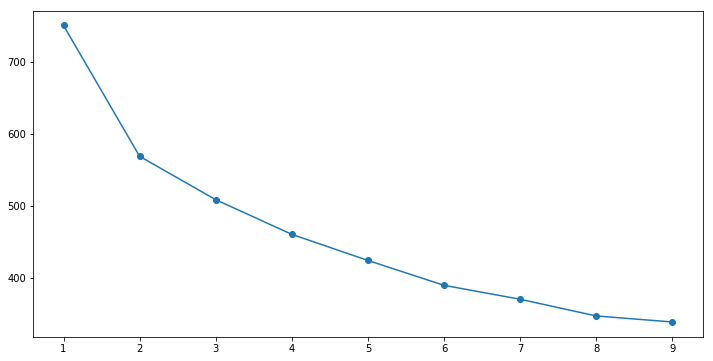

In [35]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### As the data is less so we will check number of cluster with Dendogram as the elbow curve is smooth after 2

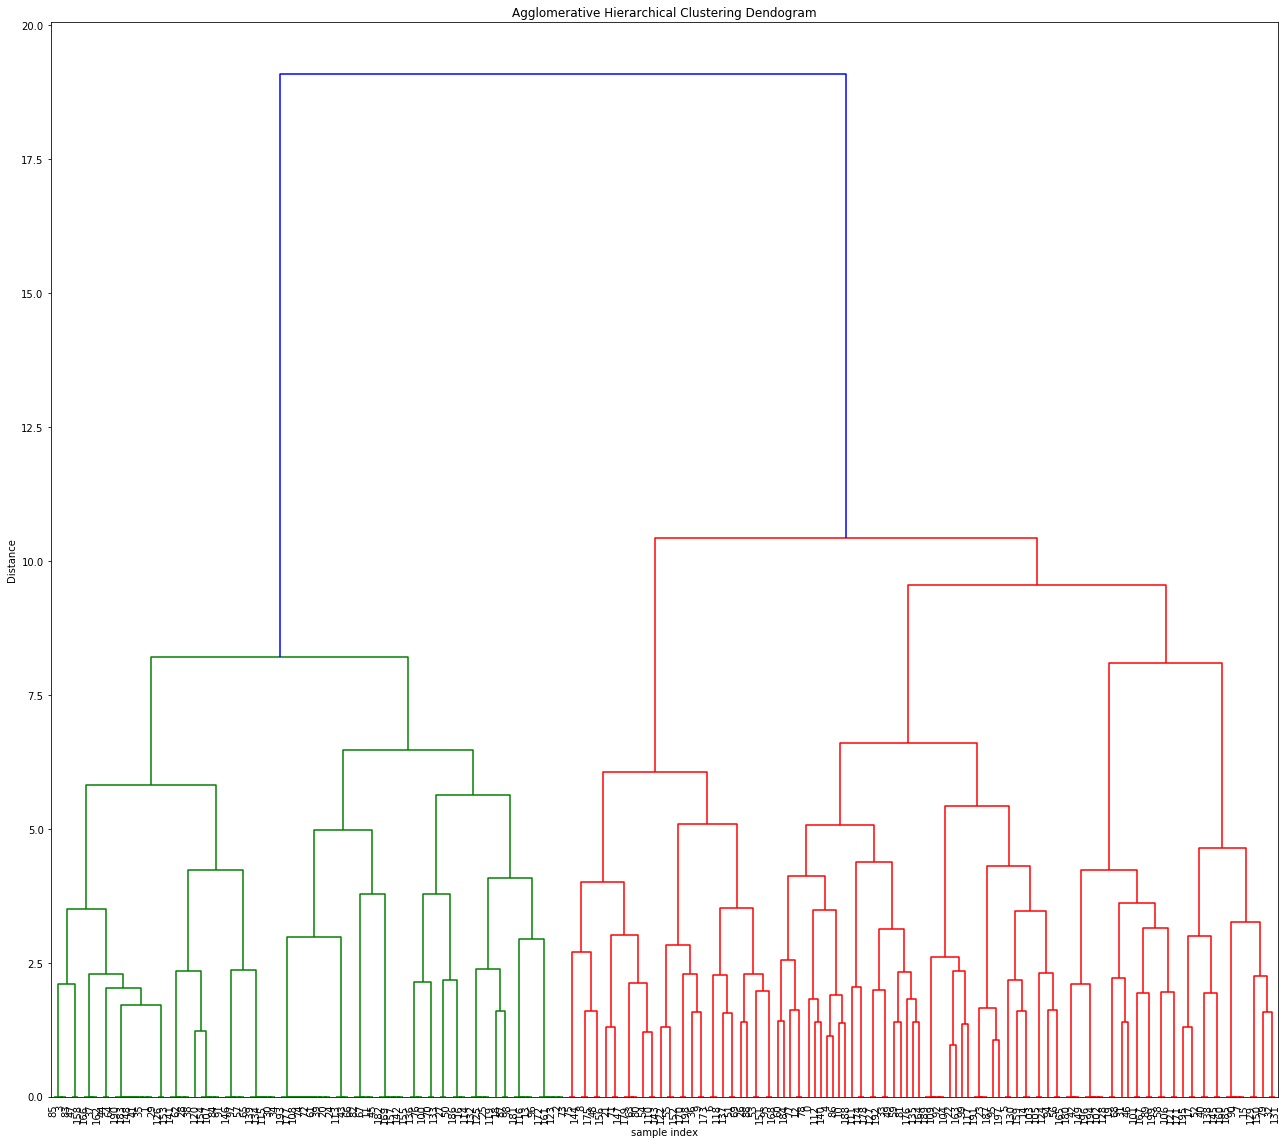

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_pca, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [37]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)
kmeans.fit(X_pca)
clusters = kmeans.labels_.tolist()

In [38]:
X_pca['clusters'] = clusters

In [39]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,clusters
0,-0.475428,-0.317021,1.172458,-0.629964,0.051390,0.230182,0.487479,0.542925,0.673567,-0.782915,0
1,1.664572,-0.407014,0.038879,-0.203398,0.320904,0.112138,0.006689,-0.136662,-0.129523,-0.064009,1
2,1.348908,0.392518,0.090918,-0.079396,0.209903,0.465574,-0.199074,0.309331,0.686751,-0.494001,1
3,1.220442,-0.178329,-0.102562,0.302253,0.370610,0.977555,0.296208,-0.204164,-0.495062,0.619828,1
4,-0.248469,0.261480,-0.032124,-0.297516,-0.565208,-0.195935,0.924770,-0.213407,0.988567,-0.679173,0


In [40]:
X_pca['clusters'].value_counts()

0    116
1     84
Name: clusters, dtype: int64

### Transform the test Data using the same PCA object that was fit on train Data

In [41]:
X_test=pca.transform(X_test)

### Use the same kmeans object assign cluster labels to the test data and store it as a feature.

In [42]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)
kmeans.fit(X_test)
clusters1 = kmeans.labels_.tolist()

In [43]:
X_test=pd.DataFrame(X_test)

In [44]:
X_test['Cluster']=clusters1

In [45]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,Cluster
0,-0.481367,1.145010,-0.288426,0.182602,0.639704,-0.169453,0.491677,-0.534579,0.236335,-0.639477,0
1,-0.232671,-0.336278,0.286821,-0.943399,0.925118,-1.172521,0.630241,0.205841,-0.008585,0.358169,0
2,1.433865,-0.219186,-0.082667,0.299413,0.389066,0.993089,0.301854,-0.263516,-0.341265,0.549983,1
3,-0.019806,-0.961358,0.594140,-0.601903,1.367562,-0.418560,0.441525,0.128136,0.022245,-0.306464,0
4,1.665131,0.177209,-0.248546,-0.547734,-0.103084,-0.626289,0.201051,-0.118308,-0.006556,0.530779,1


In [46]:
X_train1=X_pca.drop('clusters',axis=1)

In [52]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C=0.0041,kernel='linear', gamma= 1)
svc_model.fit(X_train1, y_train)

SVC(C=0.0041, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
X_test1=X_test.drop('Cluster',axis=1)

In [54]:
y_predict= svc_model .predict(X_test1)

In [55]:
print("Training Accuracy",svc_model.score(X_train1,y_train))
print("Test Accuracy",svc_model.score(X_test1,y_test))

Training Accuracy 0.96
Test Accuracy 0.96


In [58]:
from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix:\n",confusion_matrix(y_predict,y_test))
print("\n")
print("Classification Report:\n",classification_report(y_predict,y_test))

Confusion Matrix:
 [[22  1]
 [ 1 26]]


Classification Report:
              precision    recall  f1-score   support

          B       0.96      0.96      0.96        23
         NB       0.96      0.96      0.96        27

avg / total       0.96      0.96      0.96        50

